In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
'''
Program 1 Implement Linear regression
'''

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
diab_df = pd.DataFrame(diab['data'], columns=diab['feature_names'])
diab_df['target'] = diab['target']
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
diab_arr = diab_df.loc[:,diab['feature_names']].to_numpy()
diab_y = diab_df.loc[:,'target'].to_numpy()
diab_arr_train, diab_arr_test = diab_arr[:-30,:], diab_arr[-30:,:]  # split dataset into train and test dataset
diab_y_train, diab_y_test = diab_y[:-30], diab_y[-30:]
diab_arr_train.shape

(412, 10)

In [5]:
# calculate coefficients for multiple linear regression using OLS
W = np.matmul(np.linalg.inv(np.matmul(diab_arr_train.T,diab_arr_train)),diab_arr_train.T)
W = np.matmul(W,diab_y_train)

In [6]:
# generate the linear regression model
def model(W, x):
  return np.matmul(W,x)

# test the model
diab_y_pred = model(diab_arr_test, W)

In [7]:
'''
Program 3 Part A Metrics for Linear Regression
'''
# test the regression model using evaluation metrics like MAE, MSE, RMSE
# A) Using MAE loss by defining the loss function
mae_loss = 0.0
for (i,j) in zip(diab_y_pred, diab_y_test):
  mae_loss += np.abs(i-j)

mae_loss /= len(diab_y_pred)
print("Mean Absolute Loss is "+str(mae_loss))

# B) Using MSE loss by defining the loss function
mse_loss = 0.0
for (i,j) in zip(diab_y_pred, diab_y_test):
  mse_loss += ((i-j)**2)

mse_loss /= len(diab_y_pred)
print("Mean Squared Loss is "+str(mse_loss))

# C) Using RMSE loss by defining the loss function
rmse_loss = np.sqrt(mse_loss)
print("Root Mean Squared Loss is "+str(rmse_loss))

Mean Absolute Loss is 144.5145547916642
Mean Squared Loss is 22593.968011659726
Root Mean Squared Loss is 150.3129003501021


In [8]:
'''
Program 2 Implement Logistic regression
'''

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['target'] = iris['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris_arr = iris_df.loc[:,iris['feature_names']].to_numpy()
iris_y = iris_df.loc[:,'target'].to_numpy()

# creating random indices to split data into train and test data
all_indices = np.arange(0,iris_arr.shape[0])
random_indices = np.random.choice(a=all_indices, size=30, replace=False)
rem_indices = np.setdiff1d(all_indices, random_indices)

iris_arr_train, iris_arr_test = iris_arr[rem_indices], iris_arr[random_indices]  # split dataset into train and test dataset
iris_y_train, iris_y_test = iris_y[rem_indices], iris_y[random_indices]
iris_arr_test.shape

(30, 4)

In [11]:
# define sigmoid activation function
def sigmoid(x):
  y =  1/(1+np.exp(-x))
  if y<0.45:
    return 0
  elif y<0.75:
    return 1
  else:
    return 2

# for backpropagation purpose
def sigmoid_prime(x):
  return sigmoid(x)*(1-sigmoid(x))

In [12]:
# create the model
W = np.random.randn(iris_arr_train.shape[1],1)    # randomly initialise weights of logistic regression model
# feedforward values

learn_rate = 0.007 # learning rate
epochs = 100
for i in range(epochs):
  # train over all examples
  delta = np.zeros(W.shape)
  loss = 0.0
  for j in range(iris_arr_train.shape[0]):
    labels = sigmoid(np.matmul(iris_arr_train[j], W))
    error_term = (iris_y_train[j] - labels)
    sigma_prime = sigmoid_prime(np.matmul(iris_arr_train[j], W))
    delta += (error_term*sigma_prime*iris_arr_train[j])[:,None]
    loss += error_term**2
  W += learn_rate*(delta/iris_arr_train.shape[0])
  loss = (1/(iris_arr_train.shape[0]))*loss
  if i%10==0:
    #print training loss
    print("Running Loss: {}".format(loss))


Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333
Running Loss: 1.6333333333333333


In [14]:
'''
Program 3 Part B Metrics for Logistic Regression
'''

# ALERT: Don't initialise these values as floating point numbers!
true_correct = 0
true_incorrect = 0
false_correct = 0
false_incorrect = 0

base_label = 2 # assuming 2 to be the label for which 2-> true else false

for i in range(iris_arr_test.shape[0]):
  label = sigmoid(np.matmul(iris_arr_test[i], W))
  if label==base_label and iris_y_test[i]==base_label:
    true_correct+=1
  elif label!=base_label and iris_y_test[i]==base_label:
    false_incorrect+=1
  elif label==base_label and iris_y_test[i]!=base_label:
    true_incorrect+=1
  else:
    false_correct+=1

#calculating accuracy
accuracy = (true_correct/iris_y_test.shape[0])*100
print("Accuracy is "+str(accuracy)+"%")

#calculating precision
precision = true_correct/(true_correct+true_incorrect)
print("Precision is "+str(precision))

#calculating recall
recall = true_correct/(true_correct+false_incorrect)
print("Recall is "+str(recall))

#calculating F1 Score
F1_score = precision*recall/(precision+recall)
print("F1-score is "+str(F1_score))

Accuracy is 30.0%
Precision is 0.3
Recall is 1.0
F1-score is 0.23076923076923075


In [15]:
# creating the confusion matrix of the logistic regression model as a Pandas DataFrame
confusion_matrix = pd.DataFrame(index=['Predicted Labels: True','Predicted Labels: False'],
                                columns=['Actual Labels: True','Actual Labels: False'])
confusion_matrix['Actual Labels: True']['Predicted Labels: True'] = true_correct
confusion_matrix['Actual Labels: True']['Predicted Labels: False'] = false_incorrect
confusion_matrix['Actual Labels: False']['Predicted Labels: True'] = false_correct
confusion_matrix['Actual Labels: False']['Predicted Labels: False'] = true_incorrect

# displaying the confusion matrix
confusion_matrix

,Actual Labels: True,Actual Labels: False
Predicted Labels: True,9,0
Predicted Labels: False,0,21


In [16]:
#ROUGH work
# labels = sigmoid(np.matmul(iris_arr_train[0], W))
# error_term = (iris_y_train[0] - labels)
# sigma_prime = sigmoid_prime(labels)
# ((error_term*sigma_prime*iris_arr_train[0])/iris_arr_train.shape[0]).shape

# iris_arr[random_indices]
# rem_indices

# iris_arr_train.shape[0]

# len(np.setdiff1d(all_indices, random_indices))
# np.setdiff1d(all_indices, random_indices)
len(rem_indices)

120

In [17]:
# nueral network feedforward
'''
Experiment 4: Implement a feedforward nueral network incorporating hyperparameter tuning for optimal performance
'''

class NeuralNetwork:
    def __init__(self, input_dim, hidden_dims, output_dim):
      self.input_dim = input_dim
      self.hidden_dims = hidden_dims
      self.output_dim = output_dim
      self.weights = []
      self.biases = []
      self.activations = []

      # Initialize weights and biases
      if len(hidden_dims) == 0:
        self.weights.append(np.random.randn(input_dim, output_dim))
        self.biases.append(np.zeros((1, output_dim)))
        self.activations.append(np.zeros((1, output_dim)))
      else:
        self.weights.append(np.random.randn(input_dim, hidden_dims[0]))
        self.biases.append(np.zeros((1, hidden_dims[0])))
        self.activations.append(np.zeros((1, hidden_dims[0])))

        for i in range(1, len(hidden_dims)):
            self.weights.append(np.random.randn(hidden_dims[i-1], hidden_dims[i]))
            self.biases.append(np.zeros((1, hidden_dims[i])))
            self.activations.append(np.zeros((1, hidden_dims[i])))

        self.weights.append(np.random.randn(hidden_dims[-1], output_dim))
        self.biases.append(np.zeros((1, output_dim)))
        self.activations.append(np.zeros((1, output_dim)))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagation(self, X):
        self.activations[0] = self.sigmoid(np.dot(X, self.weights[0]) + self.biases[0])

        for i in range(1, len(self.hidden_dims) + 1):
            self.activations[i] = self.sigmoid(np.dot(self.activations[i-1], self.weights[i]) + self.biases[i])

        return self.activations[-1]

    def backward_propagation(self, X, y, learning_rate):
        m = X.shape[0]
        error = self.activations[-1] - y

        for i in range(len(self.hidden_dims), -1, -1):
            if i == len(self.hidden_dims):
                delta = error  *self.activations[i]*  (1 - self.activations[i])
            else:
                delta = np.dot(delta, self.weights[i+1].T)  *self.activations[i]*  (1 - self.activations[i])

            self.weights[i] -= learning_rate * np.dot(self.activations[i-1].T, delta) / m
            self.biases[i] -= learning_rate * np.mean(delta, axis=0)

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward propagation
            outputs = self.forward_propagation(X)

            # Backward propagation
            self.backward_propagation(X, y, learning_rate)

            # Calculate loss
            loss = np.mean((outputs - y) ** 2)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        return np.round(self.forward_propagation(X))

# Example usage
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize the neural network
nn = NeuralNetwork(input_dim=2, hidden_dims=[2, 3, 5], output_dim=1)

# Train the neural network
nn.train(X, y, epochs=1000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)
print("Predictions:")
print(predictions)

Epoch 0: Loss = 0.3061
Epoch 100: Loss = 0.2528
Epoch 200: Loss = 0.2501
Epoch 300: Loss = 0.2500
Epoch 400: Loss = 0.2500
Epoch 500: Loss = 0.2500
Epoch 600: Loss = 0.2500
Epoch 700: Loss = 0.2500
Epoch 800: Loss = 0.2500
Epoch 900: Loss = 0.2500
Predictions:
[[0.]
 [1.]
 [0.]
 [1.]]


In [18]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [19]:
from sklearn.tree import DecisionTreeClassifier

# set up the parameters for decision tree classifier algorithm
dt = DecisionTreeClassifier(criterion="entropy", max_depth=(iris_df.shape[1]-1)) # using entropy to measure the information of each node of the decision tree and limiting maximum depth of the decision tree

In [20]:
'''
Experiment 5: Implementation of random forest classifier
'''
# splitting training data into 3 samples to be trained on 3 decion trees

random_indices = np.random.choice(a=all_indices, size=30, replace=False)
rem_indices = np.setdiff1d(all_indices, random_indices)

iris_dtA = iris_df.loc[list(rem_indices[:40])] # for decision tree 1
iris_dtB = iris_df.loc[list(rem_indices[40:80])] # for decision tree 2
iris_dtC = iris_df.loc[list(rem_indices[80:])] # for decision tree 3

In [21]:
# for first sample A
iris_trainA = iris_dtA[iris['feature_names']]
iris_labelA = iris_dtA['target']

dta = dt.fit(iris_trainA, iris_labelA)  # training first decision tree based on first data subset

# for second sample B
iris_trainB = iris_dtB[iris['feature_names']]
iris_labelB = iris_dtB['target']

dtb = dt.fit(iris_trainB, iris_labelB)  # training second decision tree based on second data subset

# for third sample C
iris_trainC = iris_dtC[iris['feature_names']]
iris_labelC = iris_dtC['target']

dtc = dt.fit(iris_trainC, iris_labelC)  # training third decision tree based on third data subset

In [22]:
# testing all the decision on the test data
dta_pred = dta.predict(iris_arr_test)[:,None];
dtb_pred = dtb.predict(iris_arr_test)[:,None];
dtc_pred = dtc.predict(iris_arr_test)[:,None];

# merging all the made predictions and comparing against iris_y_test
all_pred = np.concatenate((dta_pred, dtb_pred, dtc_pred), axis=1);
all_pred;

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [23]:
# using voting method to create ensemble of decision trees
final_pred_randf = []
for i in range(all_pred.shape[0]):
  count = []
  for j in range(all_pred.shape[1]):
    count.append(list(all_pred[i]).count(all_pred[i][j]))
  idx = np.argmax(count)
  final_pred_randf.append(all_pred[i][idx])

# testing random forest predicitons with out test labels
test_results = final_pred_randf == iris_y_test

# printing accuracy of the random forest classifier
test_accuracy = np.sum(test_results)/test_results.shape[0]
print("The test accuracy of the random forest classifier comes around {}%".format(test_accuracy*100))

The test accuracy of the random forest classifier comes around 43.333333333333336%


In [30]:
'''
Assignment (Unit 2) Implementation of Decision tree algorithm on PlayTennis dataset
'''

data = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    'Temperature': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    'Humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    'Wind': ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    'PlayTennis': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]

    return classification

def get_potential_splits(data):

    potential_splits = {}
    for column_index in range(data.shape[1]-1):  # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        potential_splits[column_index].extend(unique_values)

    return potential_splits

def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    data_below = data[split_column_values == split_value]
    data_above = data[split_column_values !=  split_value]

    return data_below, data_above

def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy

def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits.keys():
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5):

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns
        data = df.values
    else:
        data = df


    # base cases
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # instantiate sub-tree
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} == {}".format(feature_name, split_value)
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)

        # If the answers are the same, then there is no point in asking the question.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base cases).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        return sub_tree

tree = decision_tree_algorithm(df)
pprint(tree)


'''
Assignment (Unit 2) Implementation of Gradient Boosting algorithm on Student Interactiveness dataset
'''

import numpy as np
import pandas as pd

train_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude', 'CGPA'])
train_data.loc[1] = ['Yes', 'Good', 'Good', 9.5]
train_data.loc[2] = ['No','Average','Good',8.2]
train_data.loc[3] = ['No','Good','Good',9.1]
train_data.loc[4] = ['No','Average','Poor',6.8]
train_data.loc[5] = ['Yes','Good','Good',8.5]
train_data.loc[6] = ['Yes','Good','Good',9.5]
train_data.loc[7] = ['Yes','Average','Poor',7.9]
train_data.loc[8] = ['No','Good','Good',9.1]
train_data.loc[9] = ['Yes','Good','Good',8.8]
train_data.loc[10] = ['Yes','Average','Poor',9.0]

in_features = list(train_data.columns)[:-1] # get the input features for decision stumps
out_feature = list(train_data.columns)[-1] # get the output variable to be predicted
y = np.array(train_data.loc[:,out_feature]) # get the actual predictions

pred = {}
it = 1
y_pred = np.zeros(train_data.shape[0]) # array of zeros consisting predictions to be made

for i in in_features:
  # proceed with training the decision stumps
  pred[i + str(it)] =  {}  # np.zeros(len(np.unique(train_data.loc[:,i])))
  for j in np.unique(train_data.loc[:,i]):
    pred[i + str(it)][j] = sum(train_data.loc[train_data.loc[:,i]==j,out_feature])/sum(train_data.loc[:,i]==j)
    train_data.loc[train_data.loc[:,i]==j,out_feature] = pred[i + str(it)][j]
  y_pred += train_data.loc[:,out_feature]
  # compute the residual and train next decision stump on it
  train_data.loc[:,out_feature] = y - y_pred
  it += 1

# get the predictions from the trained gradient boosted trees
print(y_pred)

{'Outlook == overcast': ['yes',
                         {'Humidity == normal': [{'Wind == weak': ['yes',
                                                                   {'Temperature == mild': ['yes',
                                                                                            'no']}]},
                                                 {'Outlook == sunny': ['no',
                                                                       {'Wind == weak': ['yes',
                                                                                         'no']}]}]}]}
1     9.344841
2     7.764286
3     8.778175
4     7.522222
5     9.344841
6     9.344841
7     8.088889
8     8.778175
9     9.344841
10    8.088889
Name: CGPA, dtype: float64


In [25]:
'''
Experiment 6: Implementation of gradient boosting for classification
'''

import numpy as np
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def log_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def log_loss_derivative(y_true, y_pred):
    return (y_pred - y_true) / (y_pred * (1 - y_pred))

class DecisionTree:
    def __init__(self, max_depth=1):
        self.max_depth = max_depth
        self.tree = {}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return {'leaf': True, 'class': int(np.argmax(np.bincount(y.astype(int))))}

        best_feature, best_threshold = self.find_best_split(X, y)
        left_indices = X.loc[:, best_feature] == best_threshold
        right_indices = X.loc[:, best_feature] != best_threshold

        tree = {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self.build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self.build_tree(X[right_indices], y[right_indices], depth + 1)
        }

        return tree

    def find_best_split(self, X, y):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in list(X.columns):
            thresholds = np.unique(X.loc[:, feature])
            for threshold in thresholds:
                left_indices = X.loc[:, feature] == threshold
                right_indices = X.loc[:, feature] != threshold

                gini = self.calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_gini(self, y_left, y_right):
        p_left = np.mean(y_left)
        p_right = np.mean(y_right)
        gini_left = 1 - p_left ** 2 - (1 - p_left) ** 2
        gini_right = 1 - p_right ** 2 - (1 - p_right) ** 2
        gini = (len(y_left) * gini_left + len(y_right) * gini_right) / (len(y_left) + len(y_right))
        return gini

    def predict(self, X):
        return np.array(self.predict_sample(X))

    def predict_sample(self, x):
        node = self.tree
        while not node['leaf']:
            if sum(x.loc[:, node['feature']] == node['threshold']):
                node = node['left']
            else:
                node = node['right']
        return node['class']

class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []

    def fit(self, X, y):
        y_pred = np.zeros_like(y, dtype=float)
        for _ in range(self.n_estimators):
            residual = y - sigmoid(y_pred)
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.estimators.append(tree)
            y_pred += self.learning_rate * tree.predict(X)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.estimators:
            y_pred += self.learning_rate * tree.predict(X)
        return np.round(sigmoid(y_pred))

train_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude', 'CGPA'])
train_data.loc[1] = ['Yes', 'Good', 'Good', 9.5]
train_data.loc[2] = ['No','Average','Good',8.2]
train_data.loc[3] = ['No','Good','Good',9.1]
train_data.loc[4] = ['No','Average','Poor',6.8]
train_data.loc[5] = ['Yes','Good','Good',8.5]
train_data.loc[6] = ['Yes','Good','Good',9.5]
train_data.loc[7] = ['Yes','Average','Poor',7.9]
train_data.loc[8] = ['No','Good','Good',9.1]
train_data.loc[9] = ['Yes','Good','Good',8.8]
train_data.loc[10] = ['Yes','Average','Poor',9.0]

X_gb = train_data.drop('CGPA', axis=1)
y_gb = np.array(train_data.loc[:,'CGPA'])

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1)
model.fit(X_gb, y_gb)

test_data = pd.DataFrame(columns = ['Interactiveness', 'Practical Knowledge', 'Aptitude'])
test_data.loc[1] = ['Yes','Good','Poor']
Xgb_test = test_data
predictions = model.predict(Xgb_test)
print(predictions)

[1.]


In [26]:
'''
Experiment 7 Part A: Reduce dimensions of data using Principal Component Analysis
'''
def preprocess_data(X):
    # Perform any necessary preprocessing steps, such as scaling or normalization
    # You can customize this function based on your specific dataset
    X = X.astype(float)

    # Subtract the mean from each feature
    X -= np.mean(X, axis=0)

    return X

def calculate_covariance_matrix(X):
    # Calculate the covariance matrix of the dataset
    covariance_matrix = np.cov(X.T)

    return covariance_matrix

def calculate_eigenvectors(covariance_matrix):
    # Calculate the eigenvectors and eigenvalues of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort the eigenvectors based on the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvectors

def reduce_dimensions(X, eigenvectors, k):
    # Project the original data onto the selected principal components
    reduced_X = np.dot(X, eigenvectors[:, :k])

    return reduced_X

# Example usage
X_dr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Preprocess the data
X_dr = preprocess_data(X_dr)

# Calculate the covariance matrix
covariance_matrix = calculate_covariance_matrix(X_dr)

# Calculate the eigenvectors
eigenvectors = calculate_eigenvectors(covariance_matrix)

# Reduce the dimensions
k = 2  # Number of principal components to keep
reduced_X = reduce_dimensions(X_dr, eigenvectors, k)

print("Original Data:")
print(X)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Reduced Data:
[[-5.19615242e+00  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 5.19615242e+00 -4.44089210e-16]]


In [27]:
'''
Experiment 7 Part B: Reduce dimensions using t- Stochastic Neighbour embedding (t-SNE) algorithm
reference for studying about t-SNE: https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a
'''
from sklearn.manifold import TSNE

tsne_model = TSNE(perplexity=2)
# fit the data into the embedding and reduce the transformed embedding as per t-SNE
reduced_X = tsne_model.fit_transform(X_dr)

print("Original Data:")
print(X_dr)
print("Reduced Data:")
print(reduced_X)

Original Data:
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]
Reduced Data:
[[ 526.55255    0.     ]
 [   0.         0.     ]
 [-526.55255    0.     ]]


In [28]:
'''
Experiment 8 Part A: Implementation of k-means clustering algorithm
'''
def k_means(X, k, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=-1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Generate random data
np.random.seed(42)
X_km = np.random.rand(100, 2)

# Run k-means clustering
k = 4
labels, centroids = k_means(X_km, k)

print("Cluster labels:", labels)
print("Centroids:", centroids)

Cluster labels: [3 0 1 3 0 3 2 1 1 2 2 1 3 1 2 2 3 0 2 0 1 3 3 1 2 0 0 0 1 1 2 0 1 3 3 2 3
 0 2 2 0 2 1 0 0 3 0 0 2 1 3 1 0 3 2 2 0 0 2 0 0 2 1 0 1 2 1 0 0 3 0 2 2 0
 1 0 1 0 0 3 3 0 3 2 1 2 2 2 0 2 2 0 3 0 2 3 0 1 0 0]
Centroids: [[0.80016224 0.61573864]
 [0.17819983 0.38746617]
 [0.5138739  0.16611676]
 [0.18212032 0.81722435]]


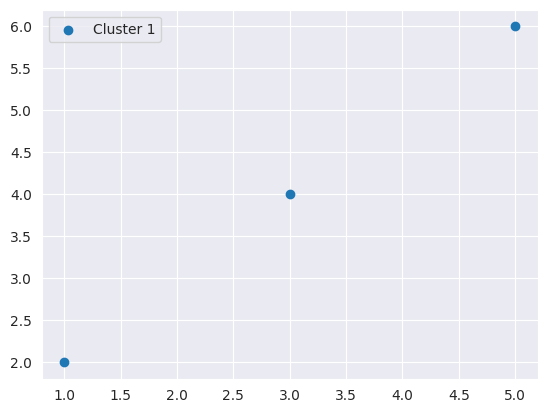

In [29]:
'''
Experiment 8 Part B: Implementation of hierarchical clustering
'''

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def compute_distance_matrix(data):
    num_points = len(data)
    dist_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            dist_matrix[i, j] = euclidean_distance(data[i], data[j])
    return dist_matrix

data = np.array([[1, 2], [3, 4], [5, 6]])
dist_matrix = compute_distance_matrix(data)

# perform agglomerative clustering based on complete link distance metric
def hierarchical_clustering(dist_matrix):
    num_points = len(dist_matrix)
    clusters = [[i] for i in range(num_points)]
    while len(clusters) > 1:
        min_dist = np.inf
        merge_indices = (0, 0)
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                for point1 in clusters[i]:
                    for point2 in clusters[j]:
                        dist = dist_matrix[point1, point2]
                        if dist < min_dist:
                            min_dist = dist
                            merge_indices = (i, j)
        i, j = merge_indices
        clusters[i].extend(clusters[j])
        del clusters[j]
    return clusters

clusters = hierarchical_clustering(dist_matrix)

def plot_clusters(data, clusters):
    for i, cluster in enumerate(clusters):
        points = data[cluster]
        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i+1}')
    plt.legend()
    plt.show()

plot_clusters(data, clusters)